# Data exploration

This file aims at exploring the original data in order to get insights about its form, strong and weak points.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium

%matplotlib inline

In [3]:
BASE_FOLDER = '../climate-change-earth-surface-temperature-data'

## Global temperature

We first want to see the tendency of the global temperature from 1750.

In [4]:
FILENAME = 'GlobalTemperatures.csv'
df = pd.read_csv(BASE_FOLDER + '/' + FILENAME)

In [5]:
df = df[['dt', 'LandAverageTemperature']]
df = df.set_index('dt')

In [6]:
df.head()

,LandAverageTemperature
dt,
1750-01-01,3.034
1750-02-01,3.083
1750-03-01,5.626
1750-04-01,8.490
1750-05-01,11.573


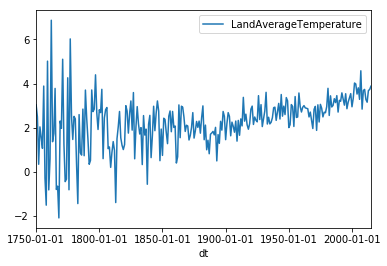

In [7]:
# Plot for one month only
df[::12].plot()
plt.show()

We see that there is a lot of variations/noise at the beginning of the time series. We then try to get smoother approximation using regression:

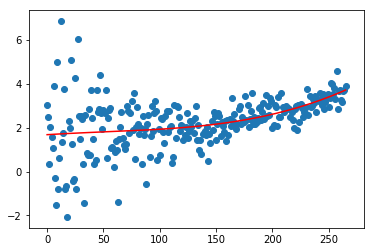

In [9]:
t = df[::12]
x = range(0, len(t.index.values))
y = t.LandAverageTemperature

fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=3)
ax.plot(x, fit[0] * x*x*x + fit[1] * x*x + fit[2] * x + fit[3], color='red')
ax.scatter(x, y)

As expected, we see that the global temperate main changes start from around 1900.

## Geographical information

We also have temperatures by country and city. We try here to see how is the data distributed across the globe.

In [10]:
FILENAME = 'GlobalLandTemperaturesByCity.csv'
city_df = pd.read_csv(BASE_FOLDER + '/' + FILENAME)

In [11]:
city_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [16]:
# Get data of one particular month
df_loc = city_df[city_df.dt == '1900-01-01'].reset_index()[['Latitude', 'Longitude']]

In [17]:
# Correct coordinate format
df_loc.Latitude = df_loc.Latitude.map(lambda x: '-' + x[:-1] if x.endswith('S') else x[:-1]).astype(float)
df_loc.Longitude = df_loc.Longitude.map(lambda x: '-' + x[:-1] if x.endswith('W') else x[:-1]).astype(float)

In [18]:
coords = df_loc.values.tolist()

In [19]:
map = folium.Map()

for p in coords: 
    folium.Marker(p).add_to(map)
    
map